In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/Jhanzkie16/BSIS_Jann2/refs/heads/main/student_grades_dataset.csv')

In [6]:
df.head()

,Student_ID,Study_Hours,Attendance_Percentage,Quiz_Average,Final_Grade
0,1,8.116262,51.571459,82.101582,43.576277
1,2,19.063572,81.820521,54.206998,45.175683
2,3,14.907885,65.717799,58.081436,53.822645
3,4,12.374511,75.428535,94.927709,59.226273
4,5,3.964354,95.378324,80.321453,44.169962


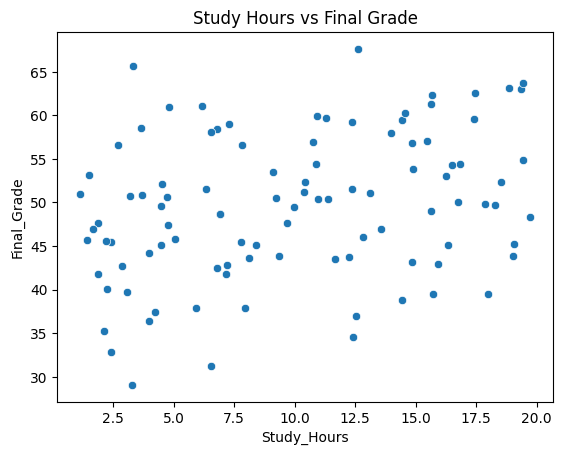

In [7]:
sns.scatterplot(x='Study_Hours', y='Final_Grade', data=df)
plt.title('Study Hours vs Final Grade')
plt.show()

In [13]:
print(df.columns)

Index(['Student_ID', 'Study_Hours', 'Attendance_Percentage', 'Quiz_Average',
       'Final_Grade'],
      dtype='object')


In [11]:
df.columns = df.columns.str.strip()

In [15]:
scaler = StandardScaler()
df[['Study_Hours', 'Attendance_Percentage', 'Quiz_Average']] = scaler.fit_transform(df[['Study_Hours', 'Attendance_Percentage', 'Quiz_Average']])

In [17]:
X = df[['Study_Hours', 'Attendance_Percentage', 'Quiz_Average']]
y = df['Final_Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 35.38981548962549
R-squared: 0.5121431379331305


In [21]:
student_input = [[10, 80, 85]]

predicted_grade = model.predict(student_input)

print(f"Predicted Final Grade: {predicted_grade[0]}")

Predicted Final Grade: 883.6232209618337


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


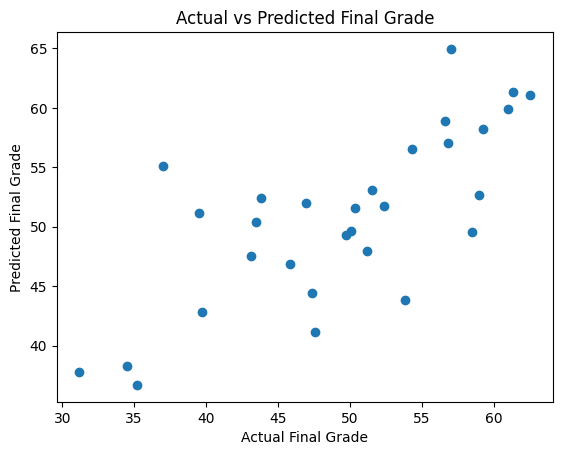

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Final Grade")
plt.show()

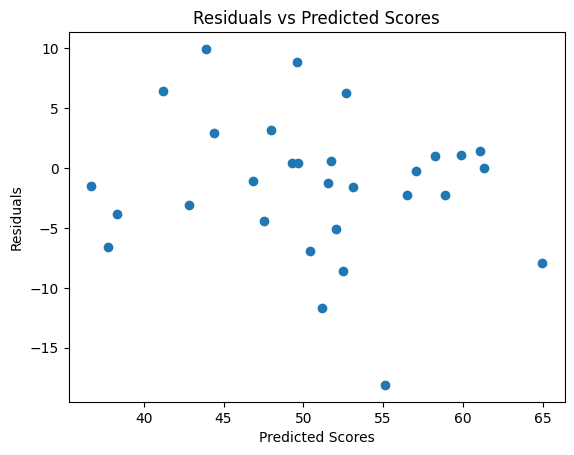

In [23]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Scores')
plt.show()